# Artificial Neural Network

#### Build ANN model on startup company dataset. Predict the  profit based on attributes.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from sklearn.compose import ColumnTransformer
#from feature_engine.outliers import Winsorizer
#from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from keras.layers import Dense


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
startup_df = pd.read_csv(r"D:\360digi\DS\Sharath\Neural_Network_Master_Class\handson\Datasets_ANN Assignment\50_Startups (2).csv")
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup_df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
startup_df.rename(columns = {'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'}, inplace = True)

In [6]:
startup_df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
# check missing values
startup_df.isnull().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

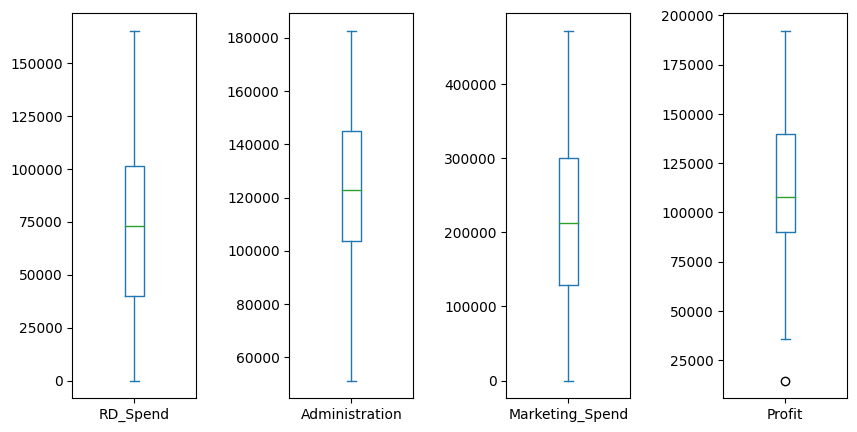

In [8]:
# box plot visualisation
startup_df.plot(kind = 'box', subplots = True, sharey = False, figsize = (10,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()
#outliers in profit column

In [9]:
# Seperating input and output variables 
X = pd.DataFrame(startup_df.iloc[:, 0:4])
Y = pd.DataFrame(startup_df.iloc[:, 4])

In [10]:
X.head()

,RD_Spend,Administration,Marketing_Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [11]:
Y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## Data Preprocessing

In [12]:
# Select numeric features for data preprocessing
numeric_features = X.select_dtypes(exclude = ['object']).columns
print(numeric_features)

Index(['RD_Spend', 'Administration', 'Marketing_Spend'], dtype='object')


In [13]:
categorical_features = X.select_dtypes(include = ['object']).columns
print(categorical_features)

Index(['State'], dtype='object')


In [14]:
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, numeric_features)]) # Skips the transformations for remaining columns

scale = scale_columntransfer.fit(X)


In [15]:
scaled_data = pd.DataFrame(scale.transform(X), columns = numeric_features)
scaled_data.describe()

,RD_Spend,Administration,Marketing_Spend
count,50.000000,50.000000,50.000000
mean,0.445854,0.533345,0.447292
std,0.277608,0.213286,0.259208
min,0.000000,0.000000,0.000000
25%,0.241527,0.399260,0.274066
50%,0.441799,0.543661,0.450876
75%,0.614474,0.712221,0.634759
max,1.000000,1.000000,1.000000


In [16]:
X.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [17]:
## Encoding Categorical features
encoding_pipeline = Pipeline([('onehot', OneHotEncoder())])

preprocess_pipeline = ColumnTransformer([('categorical', encoding_pipeline, categorical_features)])

clean =  preprocess_pipeline.fit(X)

In [18]:
encode_data = pd.DataFrame(clean.transform(X))

In [19]:
# To get feature names for Categorical columns after Onehotencoding 
encode_data.columns = clean.get_feature_names_out(input_features = X.columns)
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categorical__State_California  50 non-null     float64
 1   categorical__State_Florida     50 non-null     float64
 2   categorical__State_New York    50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [20]:
clean_data = pd.concat([scaled_data, encode_data], axis = 1)  # concatenated data will have new sequential index
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RD_Spend                       50 non-null     float64
 1   Administration                 50 non-null     float64
 2   Marketing_Spend                50 non-null     float64
 3   categorical__State_California  50 non-null     float64
 4   categorical__State_Florida     50 non-null     float64
 5   categorical__State_New York    50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [21]:
clean_data.rename(columns = {'categorical__State_New York':'categorical__State_New_York'}, inplace = True)

In [22]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   RD_Spend                       50 non-null     float64
 1   Administration                 50 non-null     float64
 2   Marketing_Spend                50 non-null     float64
 3   categorical__State_California  50 non-null     float64
 4   categorical__State_Florida     50 non-null     float64
 5   categorical__State_New_York    50 non-null     float64
dtypes: float64(6)
memory usage: 2.5 KB


In [23]:
# scaling the target variable.
num_features = ['Profit']
## Scaling with MinMaxScaler
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

scale_columntransfer = ColumnTransformer([('scale', scale_pipeline, num_features)]) # Skips the transformations for remaining columns

scale1 = scale_columntransfer.fit(Y)

In [25]:
scaled_Y = pd.DataFrame(scale1.transform(Y), columns = num_features)
scaled_Y.describe()

,Profit
count,50.000000
mean,0.548097
std,0.226974
min,0.000000
25%,0.424920
50%,0.525378
75%,0.704383
max,1.000000


In [26]:
# Splitting data into training and testing data set
X_train, X_test, Y_train, Y_test = train_test_split(clean_data, scaled_Y, test_size = 0.2, random_state = 0) 

In [27]:
X_train.shape

(40, 6)

In [28]:
X_test.shape

(10, 6)

In [29]:
Y_train.head()

,Profit
33,0.462312
35,0.460626
26,0.512737
34,0.461939
18,0.617103


In [30]:
X_test.head()

,RD_Spend,Administration,Marketing_Spend,categorical__State_California,categorical__State_Florida,categorical__State_New_York
28,0.399467,1.000000,0.250429,0.0,1.0,0.0
11,0.608845,0.308364,0.529362,1.0,0.0,0.0
10,0.616351,0.451506,0.485733,0.0,1.0,0.0
41,0.168691,0.254469,0.348614,0.0,1.0,0.0
2,0.927985,0.379579,0.864664,0.0,1.0,0.0


In [31]:
Y.Profit.unique()

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

## Model Building

### Building a Multi layer Perceptron model for which we are giving the input to train the ANN.

In [32]:
# Initializing the model
model = Sequential()
model.add(Dense(10, input_dim = 6, activation = "tanh" ))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(10, activation = "tanh"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "mse", optimizer = "adam", metrics = [tf.keras.metrics.MeanAbsoluteError()])

In [33]:
# fitting model on train data
model.fit(x = X_train, y = Y_train, 
          batch_size = 5, epochs = 50,
          verbose = 1, validation_data = (X_test, Y_test))

Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.0690 - mean_absolute_error: 0.2107 - val_loss: 0.0741 - val_mean_absolute_error: 0.2042
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0615 - mean_absolute_error: 0.1970 - val_loss: 0.0628 - val_mean_absolute_error: 0.1910
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.0563 - mean_absolute_error: 0.1879 - val_loss: 0.0534 - val_mean_absolute_error: 0.1779
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0522 - mean_absolute_error: 0.1791 - val_loss: 0.0470 - val_mean_absolute_error: 0.1692
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0489 - mean_absolute_error: 0.1738 - val_loss: 0.0431 - val_mean_absolute_error: 0.1637
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0460 - mean_absolute_error: 0.1691 - val_loss: 0.0399 - val_mean_absolute_error: 0.1601
Epoch 7/50
8/8 [======================

In [34]:
# Prediction on test data
results = pd.DataFrame(model.predict(X_test, verbose = 1))
results

1/1 [==============================] - 0s 407ms/step


,0
0,0.427523
1,0.706359
2,0.667047
3,0.345325
4,0.824156
5,0.654053
6,0.370211
7,0.426380
8,0.610811
9,0.803244


In [35]:
# Evaluating the model on test data  
eval_score_test = model.evaluate(X_test, Y_test, verbose = 1)
# Accuracy on test data set
print ("Accuracy: %.3f%%" %((1-eval_score_test[1])*100)) 
eval_score_test

1/1 [==============================] - 0s 147ms/step - loss: 0.0070 - mean_absolute_error: 0.0659
Accuracy: 93.412%


[0.007010178174823523, 0.06588215380907059]

In [36]:
# Accuracy score on train data 
eval_score_train = model.evaluate(X_train,Y_train,verbose=0)
print ("Accuracy: %.3f%%" %((1-eval_score_train[1])*100)) 

Accuracy: 94.442%
